

---


Nama : **Rully Lukas T**

NIM : **1103200181**

Model : **LeNet**


---



# **LeNet-5**
LeNet-5, merupakan jaringan saraf tiruan yang sangat efisien untuk pengenalan karakter tulisan tangan.
# **Structure of the LeNet network**
LeNet5 merupakan jaringan kecil, berisi modul-modul dasar deep learning:

1.   convolutional layer
2.   pooling layer
3.   full link layer


Ini adalah dasar dari model pembelajaran mendalam lainnya. Di sini kami menganalisis LeNet5 secara mendalam. Pada saat yang sama, melalui analisis contoh, memperdalam pemahaman tentang convolutional layer dan pooling layer.



LeNet-5 Total tujuh lapisan, tidak terdiri dari input, masing-masing berisi parameter yang dapat dilatih. Setiap lapisan memiliki sejumlah Peta Fitur, karakteristik dari masing-masing input Peta Fitur yang diekstraksi melalui filter konvolusi, dan setiap Peta Fitur memiliki beberapa neuron

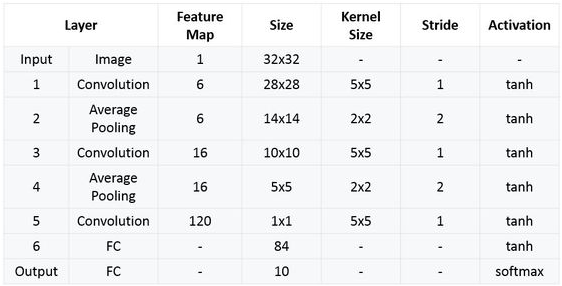

Penjelasan rinci tentang setiap parameter lapisan:

# **INPUT LAYER**

Yang pertama adalah lapisan masukan data. Ukuran gambar input dinormalisasi secara seragam menjadi 32 * 32.




> Catatan: Lapisan ini tidak dihitung sebagai struktur jaringan LeNet-5. Secara tradisional, lapisan input tidak dianggap sebagai salah satu hirarki jaringan.


# **C1 layer-convolutional layer:**



*   **Masukkan gambar**: 32 * 32
*   **Ukuran kernel konvolusi**: 5 * 5
* **Jenis kernel konvolusi**: 6
* **Ukuran peta fitur keluaran**: 28 * 28 (32-5 + 1) = 28
* **Jumlah neuron**: 28 * 28 * 6
* **Parameter yang dapat dilatih**: (5 * 5 + 1) * 6 (5 * 5 = 25 parameter unit dan satu parameter bias per filter, total 6 filter)
* **Jumlah koneksi**: (5 * 5 + 1) * 6 * 28 * 28 = 122304

# **Deskripsi rinci:**
* Operasi konvolusi pertama dilakukan pada gambar input (menggunakan 6 kernel konvolusi ukuran 5 * 5) untuk mendapatkan 6 peta fitur C1 (6 peta fitur ukuran 28 * 28, 32-5 + 1 = 28).

* Mari kita lihat berapa banyak parameter yang dibutuhkan. Ukuran kernel konvolusi adalah 5 * 5, dan ada 6 * (5 * 5 + 1) = 156 parameter secara keseluruhan, di mana +1 menunjukkan bahwa kernel memiliki bias.

* Untuk lapisan konvolusi C1, setiap piksel di C1 terhubung ke 5 * 5 piksel dan 1 bias pada gambar input, jadi ada 156 * 28 * 28 = 122304 koneksi secara keseluruhan. Ada 122.304 koneksi, tetapi kita hanya perlu mempelajari 156 parameter, terutama melalui pembagian bobot.

# **S2 layer-pooling layer (downsampling layer):**

* **Masukan**: 28 * 28
* **Area pengambilan sampel**: 2 * 2
* **Metode pengambilan sampel**: 4 input ditambahkan, dikalikan dengan parameter yang dapat dilatih, ditambah offset yang dapat dilatih. Hasil melalui sigmoid
* **Jenis pengambilan sampel**: 6
* **Fitur keluaran Ukuran peta**: 14 * 14 (28/2)
Jumlah neuron: 14 * 14 * 6
* **Parameter yang dapat dilatih**: 2 * 6 (bobot jumlah + offset)
* **Jumlah koneksi**: (2 * 2 + 1) * 6 * 14 * 14
* Ukuran setiap peta fitur di S2 adalah 1/4 dari ukuran peta fitur di C1.

# **Deskripsi rinci:**
* Operasi penggabungan diikuti segera setelah konvolusi pertama. Penyatuan dilakukan dengan menggunakan kernel 2 * 2, dan S2, 6 peta fitur 14 * 14 (28/2 = 14) diperoleh.

* Lapisan pooling dari S2 adalah jumlah piksel di area 2 * 2 di C1 dikalikan dengan koefisien bobot ditambah offset, dan kemudian hasilnya dipetakan lagi.

* Jadi setiap inti penyatuan memiliki dua parameter pelatihan, jadi ada 2x6 = 12 parameter pelatihan, tetapi ada 5x14x14x6 = 5880 koneksi.

# **C3 layer-convolutional layer:**
* **Masukan**: semua 6 atau beberapa kombinasi peta fitur dalam S2
* **Ukuran kernel konvolusi**: 5 * 5
* **Jenis kernel konvolusi**: 16
* **Ukuran peta fitur keluaran**: 10 * 10 (14-5 + 1) = 10
* Setiap peta fitur di C3 terhubung ke semua 6 atau beberapa peta fitur di S2, yang menunjukkan bahwa peta fitur dari lapisan ini adalah kombinasi yang berbeda dari peta fitur yang diekstrak dari lapisan sebelumnya.
* Salah satu caranya adalah 6 peta fitur pertama dari C3 mengambil 3 subset peta fitur yang berdekatan di S2 sebagai masukan. 6 peta fitur berikutnya mengambil 4 subset dari peta fitur yang berdekatan di S2 sebagai masukan. Tiga berikutnya mengambil 4 subset peta fitur yang tidak berdekatan sebagai input. Yang terakhir mengambil semua peta fitur di S2 sebagai masukan.
* Parameter yang dapat dilatih adalah **: 6 * (3 * 5 * 5 + 1) + 6 * (4 * 5 * 5 + 1) + 3 * (4 * 5 * 5 + 1) + 1 * (6 * 5 * 5 +1) = 1516
* **Jumlah koneksi**: 10 * 10 * 1516 = 151600

# **Deskripsi rinci:**
* Setelah penggabungan pertama, konvolusi kedua, output dari konvolusi kedua adalah C3, 16 peta fitur 10x10, dan ukuran kernel konvolusi adalah 5 * 5. Kita tahu bahwa S2 memiliki 6 peta fitur 14 * 14, bagaimana cara mendapatkan 16 peta fitur dari 6 peta fitur? Berikut adalah 16 peta fitur yang dihitung dengan kombinasi khusus dari peta fitur S2. rinciannya sebagai berikut:

* 6 peta fitur pertama dari C3 (sesuai dengan kolom ke-6 dari kotak merah pertama pada gambar di atas) terhubung ke 3 peta fitur yang terhubung ke lapisan S2 (kotak merah pertama pada gambar di atas), dan 6 peta fitur berikutnya terhubung ke lapisan S2. 4 peta fitur terhubung (kotak merah kedua pada gambar di atas), 3 peta fitur berikutnya terhubung dengan 4 peta fitur yang tidak terhubung di lapisan S2, dan yang terakhir terhubung dengan semua peta fitur di lapisan S2. Ukuran kernel konvolusi masih 5 * 5, jadi ada 6 * (3 * 5 * 5 + 1) + 6 * (4 * 5 * 5 + 1) + 3 * (4 * 5 * 5 + 1) + 1 * (6 * 5 * 5 + 1) = 1516 parameter. Ukuran gambar adalah 10 * 10, jadi ada 151600 koneksi.

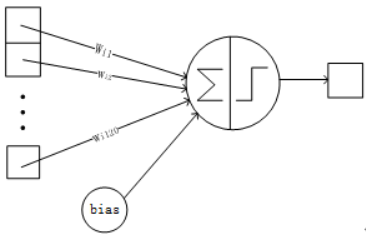

* Struktur konvolusi C3 dan 3 grafik pertama dalam S2 ditunjukkan di bawah ini:


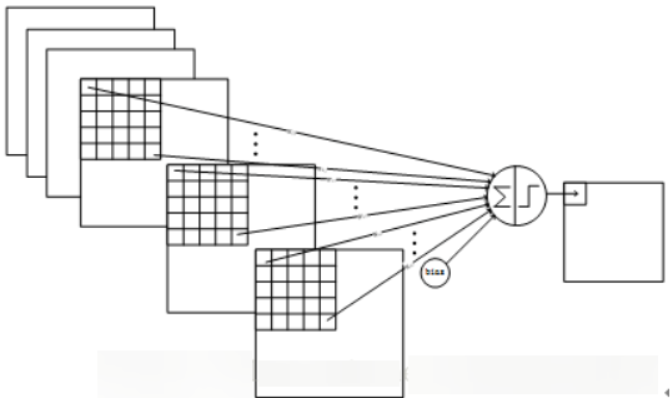

# **S4 layer-pooling layer (downsampling layer)**
* **Masukan**: 10 * 10
* **Area pengambilan sampel**: 2 * 2
* **Metode pengambilan sampel**: 4 input ditambahkan, dikalikan dengan parameter yang dapat dilatih, ditambah offset yang dapat dilatih. Hasil melalui sigmoid
* **Jenis pengambilan sampel**: 16
* **Fitur keluaran Ukuran peta**: 5 * 5 (10/2)
* **Jumlah neuron**: 5 * 5 * 16 = 400
* **Parameter yang dapat dilatih**: 2 * 16 = 32 (bobot dari penjumlahan + offset)
* **Jumlah koneksi**: 16 * (2 * 2 + 1) * 5 * 5 = 2000
Ukuran setiap peta fitur di S4 adalah 1/4 dari ukuran peta fitur di C3
# **Deskripsi rinci:**
* S4 adalah lapisan pooling, ukuran jendela masih 2 * 2, total 16 peta fitur, dan 16 peta 10x10 dari lapisan C3 disatukan dalam satuan 2x2 untuk mendapatkan 16 peta fitur 5x5. Lapisan ini memiliki total 32 parameter pelatihan sebanyak 2x16, 5x5x5x16 = 2000 koneksi.

> *Koneksinya mirip dengan lapisan S2.*



# **C5 layer-convolution layer**
* **Masukan**: Semua 16 peta fitur unit dari lapisan S4 (semua terhubung ke s4)
* **Ukuran kernel konvolusi**: 5 * 5
* **Jenis kernel konvolusi**: 120
* **Ukuran peta fitur keluaran**: 1 * 1 (5-5 + 1)
* **Parameter / koneksi yang dapat dilatih**: 120 * (16 * 5 * 5 + 1) = 48120
# **Deskripsi rinci:**
* Lapisan C5 adalah lapisan konvolusi. Karena ukuran 16 gambar pada lapisan S4 adalah 5x5, yang sama dengan ukuran kernel konvolusi, maka ukuran gambar yang terbentuk setelah konvolusi adalah 1x1. Hal ini menghasilkan 120 hasil konvolusi. Masing-masing terhubung ke 16 peta pada level sebelumnya. Jadi ada (5x5x16 + 1) x120 = 48120 parameter, dan ada juga 48120 koneksi. Struktur jaringan dari lapisan C5 adalah sebagai berikut:

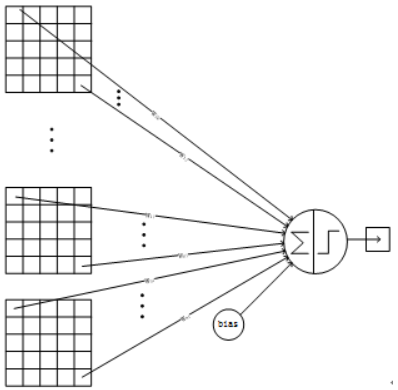

# **F6 layer-fully connected layer**
* **Masukan**: vektor 120 dimensi c5
* **Metode penghitungan**: menghitung dot product antara vektor input dan vektor bobot, ditambah offset, dan hasilnya adalah output melalui fungsi sigmoid.
* **Parameter yang dapat dilatih**: 84 * (120 + 1) = 10164
# **Deskripsi rinci:**
* Lapisan 6 adalah lapisan yang terhubung sepenuhnya. Lapisan F6 memiliki 84 node, sesuai dengan bitmap 7x12, -1 berarti putih, 1 berarti hitam, sehingga warna hitam dan putih pada bitmap setiap simbol sesuai dengan kode. Parameter pelatihan dan jumlah koneksi untuk lapisan ini adalah (120 + 1) x84 = 10164. Diagram pengkodean ASCII adalah sebagai berikut:

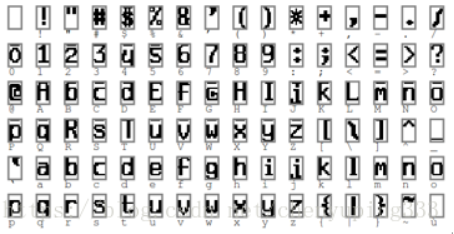

* Metode koneksi lapisan F6 adalah sebagai berikut:

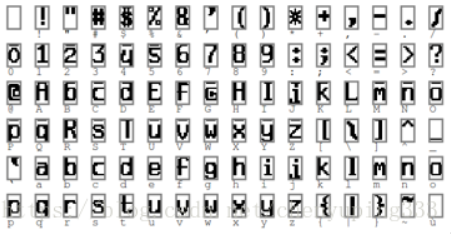

# **Output layer-fully connected layer**
* Lapisan output juga merupakan lapisan yang terhubung penuh, dengan total 10 node, yang masing-masing mewakili angka 0 hingga 9, dan jika nilai node i adalah 0, hasil pengenalan jaringan adalah angka i. Koneksi jaringan radial basis function (RBF) digunakan. Dengan asumsi x adalah input dari lapisan sebelumnya dan y adalah output dari RBF, perhitungan output RBF adalah:

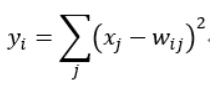

* Nilai rumus di atas w_ij ditentukan oleh pengkodean bitmap i, di mana i berkisar antara 0 hingga 9, dan j berkisar antara 0 hingga 7 * 12-1. Semakin dekat nilai output RBF dengan 0, semakin dekat dengan i, yaitu semakin dekat dengan angka pengkodean ASCII dari i, artinya hasil pengenalan yang diinputkan oleh jaringan saat ini adalah karakter i. Lapisan ini memiliki 84x10 = 840 parameter dan koneksi.

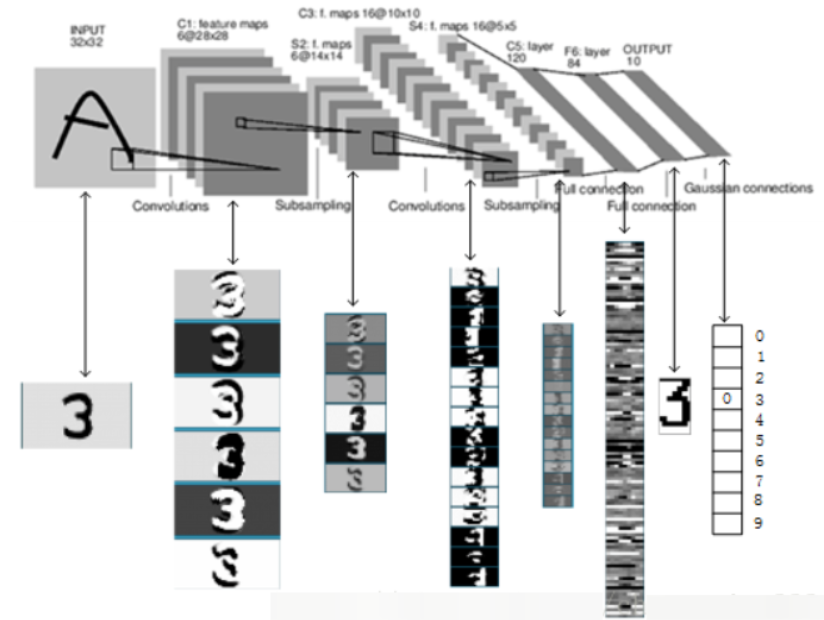

# **Rangkuman**
* LeNet-5 adalah jaringan saraf convolutional yang sangat efisien untuk pengenalan karakter tulisan tangan.
* Jaringan syaraf tiruan convolutional dapat memanfaatkan informasi struktural gambar dengan baik.
* Lapisan konvolusional memiliki lebih sedikit parameter, yang juga ditentukan oleh karakteristik utama lapisan konvolusional, yaitu koneksi lokal dan bobot bersama.

# Import Library yang Diperlukan

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

Code di atas adalah implementasi sebuah program dalam bahasa Python menggunakan library Keras untuk membangun dan melatih sebuah model neural network untuk mengenali angka dari dataset MNIST. Berikut adalah penjelasan dari setiap bagian kode tersebut:

1. import keras: Mengimpor modul keras, yang merupakan sebuah high-level neural networks API yang berjalan di atas TensorFlow, Theano, atau CNTK.

2. from keras.datasets import mnist: Mengimpor dataset MNIST, yang merupakan kumpulan data gambar angka tulisan tangan yang sangat umum digunakan dalam pembelajaran mesin.

3. from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten: Mengimpor beberapa jenis layer yang akan digunakan dalam membangun model neural network, seperti Convolutional layer (Conv2D), Max Pooling layer (MaxPooling2D), dan Fully Connected layer (Dense). Flatten digunakan untuk meratakan output dari layer sebelumnya menjadi sebuah vektor satu dimensi.

4. from keras.models import Sequential: Mengimpor model Sequential dari Keras, yang merupakan tipe model yang sederhana, berurutan, dimana lapisan-lapisan ditambahkan satu per satu.

5. import matplotlib.pyplot as plt: Mengimpor modul pyplot dari library matplotlib, yang akan digunakan untuk membuat visualisasi grafik.

6. import numpy as np: Mengimpor library NumPy dengan alias np, yang akan digunakan untuk operasi-operasi array dan matriks.

Selanjutnya, kode tersebut akan memuat dataset MNIST, membagi data menjadi data pelatihan dan pengujian, melakukan prapemrosesan data (pengubahan dimensi, normalisasi, dan one-hot encoding), membangun arsitektur model neural network, melatih model menggunakan data pelatihan, mengevaluasi model menggunakan data pengujian, dan akhirnya, menampilkan grafik model accuracy dan loss.

# Memuat Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Output yang ditampilkan menunjukkan bahwa dataset MNIST sedang diunduh dari URL yang diberikan. Proses unduhan ini dilakukan secara otomatis oleh Keras saat Anda memanggil mnist.load_data(). Setelah unduhan selesai, data akan dimuat dan dibagi menjadi data pelatihan (x_train dan y_train) dan data pengujian (x_test dan y_test).

# Pra-Prosesan Pada Data Gambar

In [ ]:
# Menjalankan Operasi Reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalisasi
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

1. Reshaping: Data gambar digit MNIST awalnya dalam format matriks 2D (28x28 piksel). Namun, untuk digunakan dalam model Convolutional Neural Network (CNN), kita perlu mengubah formatnya menjadi matriks 3D dengan dimensi (tinggi, lebar, channel). Karena gambar MNIST adalah gambar grayscale, maka kita hanya mempunyai satu channel. Oleh karena itu, kita tambahkan dimensi ke-4 dengan nilai 1 menggunakan metode reshape().

2. Normalization: Normalisasi dilakukan dengan membagi nilai piksel dari setiap gambar oleh 255. Hal ini dilakukan untuk memastikan bahwa nilai piksel berada dalam rentang 0 hingga 1, yang memudahkan proses pelatihan model.

3. One Hot Encoding: Label kelas dari dataset MNIST direpresentasikan sebagai bilangan bulat dari 0 hingga 9. Untuk menggunakan mereka dalam proses pelatihan, kita mengonversi label-label ini menjadi representasi one-hot encoding menggunakan fungsi keras.utils.to_categorical(). Ini mengonversi setiap label menjadi array biner di mana hanya satu elemen yang bernilai 1 (representasi kelas) dan yang lainnya 0. Dalam kasus ini, kita memiliki 10 kelas digit, sehingga kita memiliki array dengan panjang 10 untuk setiap label.

# Arsitektur Model LeNet

In [ ]:
# Membangun Arsitektur Model
model = Sequential()

# Menambahkan layer konvolusi pertama
# Pilih 6 kernel konvolusi dengan ukuran 5 * 5 (tanpa pergeseran), dan dapatkan 6 peta fitur.
# Ukuran setiap peta fitur adalah 32−5 + 1 = 28.
# Artinya, jumlah neuron telah dikurangi dari 1024 menjadi 28 * 28 = 784.
# Parameter antara layer input dan layer C1: 6 * (5 * 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# Input dari layer ini adalah output dari layer pertama, yang merupakan matriks node 28 * 28 * 6.
# Ukuran filter yang digunakan dalam layer ini adalah 2 * 2, dan panjang langkah dan lebar keduanya adalah 2, sehingga ukuran matriks output dari layer ini adalah 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ukuran matriks input dari layer ini adalah 14 * 14 * 6, ukuran filter yang digunakan adalah 5 * 5, dan kedalaman adalah 16.
# Layer ini tidak menggunakan padding 0 penuh, dan langkahnya adalah 1.
# Ukuran matriks output dari layer ini adalah 10 * 10 * 16.
# Layer ini memiliki 5 * 5 * 6 * 16 + 16 = 2416 parameter.
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))

# Ukuran matriks input dari layer ini adalah 10 * 10 * 16. Ukuran filter yang digunakan dalam layer ini adalah 2 * 2, dan langkah panjang dan lebarnya keduanya adalah 2,
# sehingga ukuran matriks output dari layer ini adalah 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ukuran matriks input dari layer ini adalah 5 * 5 * 16. Layer ini disebut layer konvolusi dalam makalah LeNet-5, tetapi karena ukuran filternya adalah 5 * 5,
# sehingga tidak berbeda dengan layer yang sepenuhnya terhubung.
# Jika node-node dalam matriks 5 * 5 * 16 ditarik menjadi vektor, maka layer ini sama dengan layer yang sepenuhnya terhubung.
# Jumlah node output dalam layer ini adalah 120, dengan total parameter 5 * 5 * 16 * 120 + 120 = 48120.
model.add(Flatten())
model.add(Dense(120, activation='relu'))

# Jumlah node input dalam layer ini adalah 120 dan jumlah node outputnya adalah 84. Total parameter adalah 120 * 84 + 84 = 10164 (w + b).
model.add(Dense(84, activation='relu'))

# Jumlah node input dalam layer ini adalah 84 dan jumlah node outputnya adalah 10. Total parameter adalah 84 * 10 + 10 = 850.
model.add(Dense(10, activation='softmax'))

Kode di atas merupakan pembangunan arsitektur model neural network menggunakan Keras. Berikut adalah penjelasan untuk setiap langkahnya:

1. Inisialisasi Model: Kita membuat sebuah objek Sequential yang merupakan tipe model sederhana dari Keras. Model ini digunakan untuk menumpuk lapisan-lapisan secara berurutan.

2. Convolutional Layer 1: Pertama, kita menambahkan sebuah layer konvolusi (Conv2D) dengan 6 filter/kernel berukuran 5x5. Aktivasi relu digunakan setelah operasi konvolusi. input_shape=(28, 28, 1) menunjukkan bahwa input yang diterima adalah gambar dengan dimensi 28x28 piksel dan memiliki satu channel (grayscale).

3. Max Pooling Layer 1: Setelah konvolusi pertama, kita menambahkan sebuah layer max pooling (MaxPooling2D) dengan filter berukuran 2x2. Ini akan mengurangi dimensi spasial gambar menjadi setengahnya (dari 28x28 menjadi 14x14) dan mengurangi jumlah parameter yang harus dipelajari.

4. Convolutional Layer 2: Kemudian, kita menambahkan layer konvolusi kedua (Conv2D) dengan 16 filter/kernel berukuran 5x5. Aktivasi relu juga digunakan setelah operasi konvolusi.

5. Max Pooling Layer 2: Setelah konvolusi kedua, kita lagi-lagi menambahkan layer max pooling (MaxPooling2D) dengan filter berukuran 2x2. Ini akan mengurangi dimensi spasial gambar menjadi setengahnya lagi (dari 14x14 menjadi 7x7).

6. Flatten Layer: Kita menggunakan layer flatten (Flatten) untuk meratakan output dari layer sebelumnya menjadi sebuah vektor satu dimensi. Ini akan menyiapkan input untuk layer-later fully connected.

7. Fully Connected Layer 1: Selanjutnya, kita menambahkan sebuah layer fully connected (Dense) dengan 120 neuron dan aktivasi relu.

8. Fully Connected Layer 2: Kemudian, kita menambahkan layer fully connected kedua (Dense) dengan 84 neuron dan aktivasi relu.

9. Output Layer: Terakhir, kita menambahkan output layer (Dense) dengan 10 neuron (sesuai dengan jumlah kelas digit yang berbeda) dan aktivasi softmax. Ini akan menghasilkan probabilitas untuk setiap kelas digit.

# Latih Model

In [ ]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

Baris kode ini adalah bagian dari proses kompilasi model. Ini mengonfigurasi model untuk pelatihan dengan menentukan fungsi kerugian, pengoptimal, dan metrik yang akan digunakan untuk mengevaluasi kinerja model. Berikut adalah penjelasan untuk setiap argumen:

1. Loss Function: Argumen pertama (loss) menentukan fungsi kerugian yang akan digunakan selama pelatihan. Dalam kasus ini, keras.metrics.categorical_crossentropy digunakan. Ini adalah fungsi kerugian umum yang digunakan untuk klasifikasi multikelas saat targetnya adalah one-hot encoded.

2. Optimizer: Argumen kedua (optimizer) menentukan algoritma optimasi yang akan digunakan untuk menyesuaikan bobot model selama pelatihan. Dalam kode ini, keras.optimizers.Adam() digunakan, yang merupakan implementasi dari algoritma optimasi Adam yang efisien.

3. Metrics: Argumen terakhir (metrics) adalah daftar metrik yang akan dihitung dan dilaporkan selama pelatihan dan evaluasi model. Dalam kasus ini, kita tertarik untuk melihat akurasi klasifikasi, oleh karena itu 'accuracy' disertakan dalam daftar metrik.

Dengan menggunakan model.compile(), model sekarang telah dikompilasi dan siap untuk dilatih menggunakan data pelatihan.

In [ ]:
History = model.fit(x_train, y_train, batch_size=360, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
167/167 [==============================] - 28s 158ms/step - loss: 0.6298 - accuracy: 0.8225 - val_loss: 0.1687 - val_accuracy: 0.9495
Epoch 2/20
167/167 [==============================] - 23s 137ms/step - loss: 0.1458 - accuracy: 0.9570 - val_loss: 0.1053 - val_accuracy: 0.9681
Epoch 3/20
167/167 [==============================] - 20s 120ms/step - loss: 0.1042 - accuracy: 0.9686 - val_loss: 0.0769 - val_accuracy: 0.9768
Epoch 4/20
167/167 [==============================] - 21s 128ms/step - loss: 0.0823 - accuracy: 0.9749 - val_loss: 0.0622 - val_accuracy: 0.9804
Epoch 5/20
167/167 [==============================] - 20s 120ms/step - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.0565 - val_accuracy: 0.9809
Epoch 6/20
167/167 [==============================] - 23s 137ms/step - loss: 0.0585 - accuracy: 0.9824 - val_loss: 0.0514 - val_accuracy: 0.9820
Epoch 7/20
167/167 [==============================] - 20s 120ms/step - loss: 0.0518 - accuracy: 0.9848 - val_loss: 0.0471 - val_ac

Baris kode ini digunakan untuk melatih model dengan menggunakan data pelatihan (x_train dan y_train). Berikut adalah penjelasan untuk setiap argumen:

1. Data Pelatihan: Argumen pertama (x_train) adalah input gambar pelatihan.

2. Label Pelatihan: Argumen kedua (y_train) adalah label yang sesuai dengan gambar pelatihan.

3. Batch Size: Argumen ketiga (batch_size) menentukan jumlah sampel yang akan digunakan dalam setiap iterasi pelatihan. Dalam hal ini, batch size adalah 360, yang berarti 360 sampel akan diproses dalam setiap iterasi.

4. Epochs: Argumen keempat (epochs) menentukan jumlah iterasi pelatihan yang akan dilakukan. Dalam kasus ini, pelatihan akan dilakukan selama 20 epochs, artinya seluruh dataset pelatihan akan diberikan ke model sebanyak 20 kali untuk pembelajaran.

5. Verbose: Argumen kelima (verbose) menentukan bagaimana kemajuan pelatihan akan ditampilkan. Nilai 1 berarti kemajuan akan ditampilkan di setiap epoch.

6. Data Validasi: Argumen terakhir (validation_data) adalah data yang akan digunakan untuk validasi model setiap akhir epoch pelatihan. Dalam hal ini, kita menggunakan data pengujian (x_test dan y_test) untuk melakukan validasi.

Hasil pelatihan akan disimpan dalam variabel History, yang berisi informasi tentang akurasi dan loss selama pelatihan untuk digunakan nanti dalam evaluasi dan visualisasi.

**Kesimpulan dari output pelatihan di atas adalah sebagai berikut:**

1. Terjadi penurunan nilai loss (kerugian) baik pada data pelatihan maupun data validasi dari epoch ke epoch. Hal ini menunjukkan bahwa model secara bertahap belajar dari data dan mampu menghasilkan prediksi yang lebih baik.

2. Akurasi (accuracy) pada data pelatihan dan data validasi juga meningkat seiring dengan peningkatan jumlah epoch. Ini menunjukkan bahwa model semakin baik dalam mengklasifikasikan data.

3. Meskipun terjadi peningkatan yang signifikan pada awal-awal iterasi, namun peningkatan akurasi cenderung melambat seiring dengan bertambahnya epoch.

4. Meskipun akurasi pada data pelatihan cukup tinggi (hampir mencapai 100%), namun akurasi pada data validasi tidak jauh berbeda, yang menunjukkan bahwa model tidak mengalami overfitting (penyesuaian berlebihan) pada data pelatihan.

Karena akurasi pada data validasi tetap meningkat, sementara loss pada data validasi tetap rendah, dapat disimpulkan bahwa model telah belajar dengan baik dan mampu menggeneralisasi dengan baik terhadap data yang tidak terlihat sebelumnya.

# Evaluasi Model

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0415 - accuracy: 0.9879
Test Loss: 0.04150946065783501
Test accuracy: 0.9879000186920166


Output tersebut memberikan informasi tentang loss (kerugian) dan akurasi model pada data pengujian. Berikut adalah penjelasan singkatnya:

1. Test Loss: Nilai loss yang diperoleh pada data pengujian adalah sekitar 0.0415.

2. Test Accuracy: Akurasi yang diperoleh pada data pengujian adalah sekitar 98.79%.

Kedua metrik tersebut menunjukkan bahwa model yang telah dilatih memiliki kinerja yang sangat baik dalam mengklasifikasikan data pengujian. Loss yang rendah dan akurasi yang tinggi menandakan bahwa model mampu dengan baik dalam menggeneralisasi dan melakukan prediksi yang tepat terhadap data baru yang belum pernah dilihat sebelumnya.

In [ ]:
# Total data training
total_train_data = len(x_train)
# Total data testing
total_test_data = len(x_test)

print("Total data in training set:", total_train_data)
print("Total data in testing set:", total_test_data)

Total data in training set: 60000
Total data in testing set: 10000


Dua baris kode di atas digunakan untuk menghitung total jumlah data dalam set pelatihan dan set pengujian, dan kemudian mencetak jumlahnya.

1. total_train_data = len(x_train): Kode ini menghitung jumlah data dalam set pelatihan dengan mengambil panjang (length) dari array x_train, yang merupakan array gambar pelatihan. Panjang array x_train adalah jumlah total sampel pelatihan.

2. total_test_data = len(x_test): Kode ini melakukan hal yang sama untuk menghitung jumlah data dalam set pengujian. Panjang array x_test adalah jumlah total sampel pengujian.

Hasilnya akan mencetak jumlah total data dalam set pelatihan dan pengujian. Dengan informasi ini, Anda dapat mengetahui seberapa besar ukuran data yang Anda gunakan untuk melatih dan menguji model.

In [ ]:
# Predictions on training data
train_predictions = model.predict(x_train)
train_correct = sum([1 for i in range(len(train_predictions)) if np.argmax(train_predictions[i]) == np.argmax(y_train[i])])

# Predictions on testing data
test_predictions = model.predict(x_test)
test_correct = sum([1 for i in range(len(test_predictions)) if np.argmax(test_predictions[i]) == np.argmax(y_test[i])])

print("Total correct predictions on training data:", train_correct)
print("Total correct predictions on testing data:", test_correct)

313/313 [==============================] - 2s 6ms/step
Total correct predictions on training data: 59660
Total correct predictions on testing data: 9879


Kode di atas bertujuan untuk melakukan prediksi pada data pelatihan dan pengujian menggunakan model yang telah dilatih sebelumnya, dan kemudian menghitung jumlah prediksi yang benar. Berikut adalah penjelasan singkatnya:

1. train_predictions = model.predict(x_train): Kode ini digunakan untuk memperoleh prediksi model pada data pelatihan (x_train). Fungsi predict digunakan untuk menghasilkan prediksi kelas untuk setiap sampel dalam data pelatihan.

2. train_correct = sum([1 for i in range(len(train_predictions)) if np.argmax(train_predictions[i]) == np.argmax(y_train[i])]): Kode ini menghitung jumlah prediksi yang benar pada data pelatihan. Loop for digunakan untuk mengiterasi melalui setiap prediksi dan label yang sesuai. Jika prediksi kelas yang dihasilkan oleh model sama dengan label yang sebenarnya (argmax(train_predictions[i]) == argmax(y_train[i])), maka prediksi dianggap benar. Total prediksi yang benar kemudian dihitung menggunakan fungsi sum().

3. test_predictions = model.predict(x_test): Kode ini serupa dengan yang pertama, tetapi digunakan untuk memperoleh prediksi pada data pengujian (x_test).

4. test_correct = sum([1 for i in range(len(test_predictions)) if np.argmax(test_predictions[i]) == np.argmax(y_test[i])]): Kode ini mirip dengan yang kedua, tetapi digunakan untuk menghitung jumlah prediksi yang benar pada data pengujian.

Setelah itu, total prediksi yang benar pada data pelatihan dan pengujian dicetak untuk memberikan informasi tentang kinerja model pada kedua set data tersebut.

# Visualisasi Model

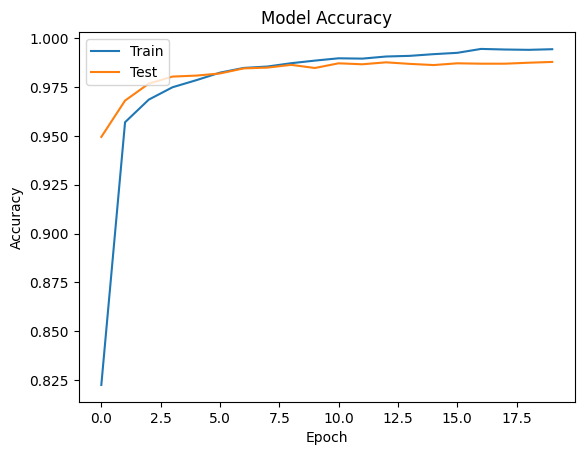

In [ ]:
# Plotting model accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plot di atas menunjukkan perkembangan akurasi model pada set pelatihan dan pengujian selama proses pelatihan. Berikut adalah penjelasan singkatnya:

1. plt.plot(History.history['accuracy']): Ini memplot akurasi model pada set pelatihan untuk setiap epoch yang disimpan dalam objek History. Garis ini mewakili bagaimana akurasi model pada data pelatihan berubah seiring berjalannya pelatihan.

2. plt.plot(History.history['val_accuracy']): Ini memplot akurasi model pada set pengujian untuk setiap epoch yang disimpan dalam objek History. Garis ini mewakili bagaimana akurasi model pada data pengujian berubah seiring berjalannya pelatihan.

3. plt.title('Model Accuracy'): Menetapkan judul plot sebagai "Model Accuracy".

4. plt.ylabel('Accuracy'): Menetapkan label sumbu y sebagai "Accuracy" yang menggambarkan skala akurasi.

5. plt.xlabel('Epoch'): Menetapkan label sumbu x sebagai "Epoch" yang menggambarkan jumlah epoch atau iterasi pelatihan.

6. plt.legend(['Train', 'Test'], loc='upper left'): Menampilkan legenda yang menjelaskan garis-garis plot. "Train" merujuk pada akurasi pada data pelatihan dan "Test" merujuk pada akurasi pada data pengujian. Lokasi legenda diletakkan di kiri atas plot.

7. plt.show(): Menampilkan plot secara keseluruhan.

Dengan melihat plot ini, Anda dapat memahami bagaimana akurasi model berkembang selama proses pelatihan dan apakah model tersebut mengalami overfitting atau tidak. Jika kedua garis mendekati atau bahkan saling berdekatan, itu menunjukkan bahwa model tidak mengalami overfitting dan mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

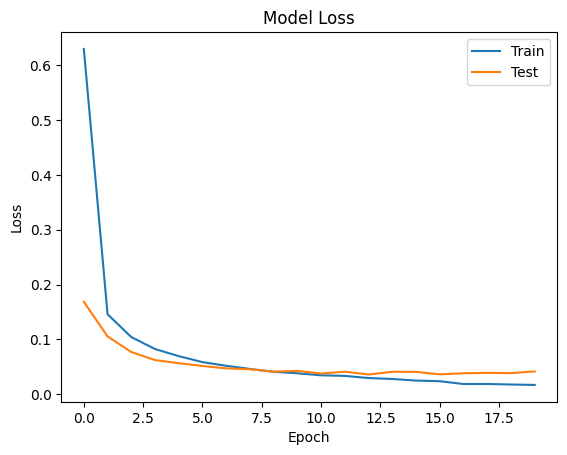

In [ ]:
# Plotting model loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Plot di atas menunjukkan perkembangan loss (kerugian) model pada set pelatihan dan pengujian selama proses pelatihan. Berikut adalah penjelasan singkatnya:

1. plt.plot(History.history['loss']): Ini memplot loss model pada set pelatihan untuk setiap epoch yang disimpan dalam objek History. Garis ini mewakili bagaimana loss model pada data pelatihan berubah seiring berjalannya pelatihan.

2. plt.plot(History.history['val_loss']): Ini memplot loss model pada set pengujian untuk setiap epoch yang disimpan dalam objek History. Garis ini mewakili bagaimana loss model pada data pengujian berubah seiring berjalannya pelatihan.

3. plt.title('Model Loss'): Menetapkan judul plot sebagai "Model Loss".

4. plt.ylabel('Loss'): Menetapkan label sumbu y sebagai "Loss" yang menggambarkan skala loss.

5. plt.xlabel('Epoch'): Menetapkan label sumbu x sebagai "Epoch" yang menggambarkan jumlah epoch atau iterasi pelatihan.

6. plt.legend(['Train', 'Test'], loc='upper right'): Menampilkan legenda yang menjelaskan garis-garis plot. "Train" merujuk pada loss pada data pelatihan dan "Test" merujuk pada loss pada data pengujian. Lokasi legenda diletakkan di kanan atas plot.

7. plt.show(): Menampilkan plot secara keseluruhan.

Dengan melihat plot ini, Anda dapat memahami bagaimana loss model berkembang selama proses pelatihan. Jika kedua garis mendekati atau bahkan saling berdekatan, itu menunjukkan bahwa model tidak mengalami overfitting dan mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.